In [10]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('modeling_video_game_dataset.csv')

In [28]:
df.head()

,Year_of_Release,Global_players,Critic_Score,User_Score,Sequel,Lifecycle,MaxPlayers,Online,Licensed,Handheld,...,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,NA_Sales_More_Eu
0,2012,0.84,71.0,7.9,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
1,2002,1.27,75.0,8.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
2,2002,0.68,76.0,8.9,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
3,2002,0.46,70.0,8.7,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
4,2000,0.53,51.0,4.6,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [3]:
#seperate target and other features
target = df['NA_Sales_More_Eu']
features = df.drop(['NA_Sales_More_Eu'], axis=1)

In [4]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

## Scale

In [5]:
#scale data
sc=StandardScaler()
#firt model to training data - not testing data
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Handling Class Imbalance

In [6]:
#create false data - similar to KNN
sm = SMOTE(ratio=1.0)
X_train_scaled, y_train = sm.fit_sample(X_train_scaled, y_train)

In [7]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([5915, 5915]))

## Baseline models

In [8]:
#print out some metrics about resulting prediction
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [35]:
#baseline logistic - use scaled data
print('baseline Logistic')
print('-------------------')
lm = LogisticRegression()
lm.fit(X_train_scaled, y_train)
print('train')
train_preds = lm.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = lm.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

baseline Logistic
-------------------
train
Precision Score: 0.7609903189969847
Recall Score: 0.8129874533740251
Accuracy Score: 0.7788233299423534
F1 Score: 0.7861300106566113

test
Precision Score: 0.9136904761904762
Recall Score: 0.8247145735392881
Accuracy Score: 0.7989333333333334
F1 Score: 0.8669255206494881
-------------------
True Positives: 1228
True Negatives: 270
False Positives: 116
False Negatives: 261


In [36]:
#baseline K Nearest Neighbors - use scaled data
print('baseline K Nearest Neighbors')
print('-------------------')
lm = KNeighborsClassifier()
lm.fit(X_train_scaled, y_train)
print('train')
train_preds = lm.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = lm.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

baseline K Nearest Neighbors
-------------------
train
Precision Score: 0.9468976018271793
Recall Score: 0.8435062733129874
Accuracy Score: 0.8981010512037979
F1 Score: 0.8922166427546628

test
Precision Score: 0.9005481597494127
Recall Score: 0.7723304231027536
Accuracy Score: 0.7514666666666666
F1 Score: 0.831525668835864
-------------------
True Positives: 1150
True Negatives: 259
False Positives: 127
False Negatives: 339


In [37]:
#baseline Decision Trees - use scaled data
print('baseline Decision Tree')
print('-------------------')
lm = DecisionTreeClassifier()
lm.fit(X_train_scaled, y_train)
print('train')
train_preds = lm.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = lm.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

baseline Decision Tree
-------------------
train
Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0

test
Precision Score: 0.8971308607417775
Recall Score: 0.8609805238415044
Accuracy Score: 0.8112
F1 Score: 0.8786840301576423
-------------------
True Positives: 1282
True Negatives: 239
False Positives: 147
False Negatives: 207


In [38]:
#baseline Random Forest - use scaled data
print('baseline Random Forest')
print('-------------------')
lm = RandomForestClassifier()
lm.fit(X_train_scaled, y_train)
print('train')
train_preds = lm.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = lm.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

baseline Random Forest
-------------------
train
Precision Score: 0.9982955513891256
Recall Score: 0.993048491013903
Accuracy Score: 0.995676500508647
F1 Score: 0.9956651083722907

test
Precision Score: 0.9083969465648855
Recall Score: 0.8791134989926125
Accuracy Score: 0.8336
F1 Score: 0.8935153583617748
-------------------
True Positives: 1309
True Negatives: 254
False Positives: 132
False Negatives: 180


In [39]:
#baseline XGBoost - use scaled data
print('baseline XGBoost')
print('-------------------')
lm = XGBClassifier()
lm.fit(X_train_scaled, y_train)
print('train')
train_preds = lm.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = lm.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

baseline XGBoost
-------------------
train
Precision Score: 0.8390157606947571
Recall Score: 0.8845371312309257
Accuracy Score: 0.8574092912851814
F1 Score: 0.8611753053813139

test
Precision Score: 0.9112508735150244
Recall Score: 0.8757555406312961
Accuracy Score: 0.8336
F1 Score: 0.8931506849315067
-------------------
True Positives: 1304
True Negatives: 259
False Positives: 127
False Negatives: 185


Without Tuning
- Logistic Regression had the biggest improvement to testing data
- KNN doesn't perform as well as the other models, had a lot of False Negatives
- Decision Trees looks well rounded
- Random Forest looks overfit
- XGBost looks to be the best model out of the bunch

## Model Tuning

In [40]:
#Logistic Regression Tuning
grid_params_lr = [{'penalty': ['l1', 'l2'], 
                    'C' : [0.001,0.01,0.01,1,2,5,10],
                    'fit_intercept': [True,False],
                    'max_iter': range(70,130,10)}] 

gs_lr = GridSearchCV(estimator=LogisticRegression(),
                    param_grid=grid_params_lr,
                    scoring='f1',
                    cv=5)
gs_lr.fit(X_train_scaled, y_train)
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(gs_lr.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs_lr.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs_lr.best_estimator_)

#print results
print('Logistic Regression')
print('-------------------')

print('train')
train_preds = gs_lr.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = gs_lr.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

0.784630603985053
{'C': 1, 'fit_intercept': True, 'max_iter': 70, 'penalty': 'l1'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=70, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Logistic Regression
-------------------
train
Precision Score: 0.76114902396445
Recall Score: 0.813157002373686
Accuracy Score: 0.7789928789420142
F1 Score: 0.7862939585211902

test
Precision Score: 0.913626209977662
Recall Score: 0.8240429818670248
Accuracy Score: 0.7984
F1 Score: 0.8665254237288137
-------------------
True Positives: 1227
True Negatives: 270
False Positives: 116
False Negatives: 262


In [12]:
#KNN tuning
grid_params_KNN = [{'n_neighbors': range(1,50,2),
                    'p': [1,2,3]}] 

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=grid_params_KNN,
                           scoring='f1',
                           cv=5,
                           verbose=5)
gs_KNN.fit(X_train_scaled, y_train)
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(gs_KNN.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs_KNN.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs_KNN.best_estimator_)

#print results
print('K Nearest Neighbors')
print('-------------------')

print('train')
train_preds = gs_KNN.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = gs_KNN.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

0.8804718475253878
{'n_neighbors': 1, 'p': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=1,
           weights='uniform')
K Nearest Neighbors
-------------------
train
Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0

test
Precision Score: 0.8773388773388774
Recall Score: 0.8600543478260869
Accuracy Score: 0.7957333333333333
F1 Score: 0.8686106346483704
-------------------
True Positives: 1266
True Negatives: 226
False Positives: 177
False Negatives: 206


In [48]:
#Decision Trees
grid_params_dt = [{'criterion': ['gini','entropy'], 
                    'min_samples_leaf' : range(5,100,15),
                    'max_depth': range(2,20,1)}] 

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid=grid_params_dt,
                    scoring='f1',
                    cv=5,
                    verbose=1)
gs_dt.fit(X_train_scaled, y_train)
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(gs_dt.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs_dt.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs_dt.best_estimator_)

#print results
print('Decision Trees')
print('-------------------')

print('train')
train_preds = gs_dt.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = gs_dt.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8549074453670996
{'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 5}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=17,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Decision Trees
-------------------
train
Precision Score: 0.9263989245504957
Recall Score: 0.9347236351305527
Accuracy Score: 0.9302305866395388
F1 Score: 0.9305426618280024

test
Precision Score: 0.8967428967428968
Recall Score: 0.8690396239086635
Accuracy Score: 0.8165333333333333
F1 Score: 0.8826739427012278
-------------------
True Positives: 1294
True Negatives: 237
False Positives: 149
False Negatives: 195


[Parallel(n_jobs=1)]: Done 1260 out of 1260 | elapsed:   56.9s finished


In [14]:
#Random Forest
grid_params_rf = [{'criterion': ['gini','entropy'], 
                    'min_samples_leaf' : range(1,6,1),
                    'max_depth': range(2,20,1),
                    'n_estimators': range(10,21,10),
                    'min_samples_split' : range(2,10,2)}] 

gs_rf = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=grid_params_rf,
                    scoring='f1',
                    cv=5,
                    verbose=5)
gs_rf.fit(X_train_scaled, y_train)
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(gs_rf.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs_rf.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs_rf.best_estimator_)
print('\n')
#print results
print('Random Forest')
print('-------------------')

print('train')
train_preds = gs_rf.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = gs_rf.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

0.8960676390299402
{'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Random Forest
-------------------
train
Precision Score: 0.962298927613941
Recall Score: 0.9709213863060017
Accuracy Score: 0.9664412510566357
F1 Score: 0.9665909282167803

test
Precision Score: 0.91283459162663
Recall Score: 0.9035326086956522
Accuracy Score: 0.8565333333333334
F1 Score: 0.9081597814953909
-------------------
True Positives: 1330
True Negatives: 276
False Positives: 127
False Negatives: 142


In [16]:
#XGBoost
grid_params_xgb = [{'max_depth': range(2,10,1),
                    'learning_rate': [0.01, 0.1, 1],
                    'colsample_bytree': [0.01, 0.1, 1],
                    'alpha': [0, 0.1, 1],
                    'eta': [0.1, 0.3, 0.5]}] 

gs_xgb = GridSearchCV(estimator=XGBClassifier(),
                    param_grid=grid_params_xgb,
                    scoring='f1',
                    cv=5,
                    verbose=5)
gs_xgb.fit(X_train_scaled, y_train)
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(gs_xgb.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs_xgb.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs_xgb.best_estimator_)
print('\n')
#print results
print('XGBoost')
print('-------------------')

print('train')
train_preds = gs_xgb.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = gs_xgb.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

0.9029214725119428
{'alpha': 0, 'colsample_bytree': 1, 'eta': 0.1, 'learning_rate': 0.1, 'max_depth': 9}
XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


XGBoost
-------------------
train
Precision Score: 0.9499253855082076
Recall Score: 0.9685545224006763
Accuracy Score: 0.958748943364328
F1 Score: 0.9591495061108322

test
Precision Score: 0.9103260869565217
Recall Score: 0.9103260869565217
Accuracy Score: 0.8592
F1 Score: 0.9103260869565217
-------------------
True Positives: 1340
True Negatives: 271
False Positives: 132
False Negatives: 132


# Best Model

In [17]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
#prints out a confusion matrix
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    plt.figure(figsize=(10,10))
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name), fontsize=15)
    else:
        plt.title("Confusion Matrix", fontsize=15)
    plt.ylabel('True Label', fontsize=15)
    plt.xlabel('Predicted Label', fontsize=15)
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

In [18]:
#print best model
print('XGBoost')
print('-------------------')

print('train')
train_preds = gs_xgb.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = gs_xgb.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

XGBoost
-------------------
train
Precision Score: 0.9499253855082076
Recall Score: 0.9685545224006763
Accuracy Score: 0.958748943364328
F1 Score: 0.9591495061108322

test
Precision Score: 0.9103260869565217
Recall Score: 0.9103260869565217
Accuracy Score: 0.8592
F1 Score: 0.9103260869565217
-------------------
True Positives: 1340
True Negatives: 271
False Positives: 132
False Negatives: 132


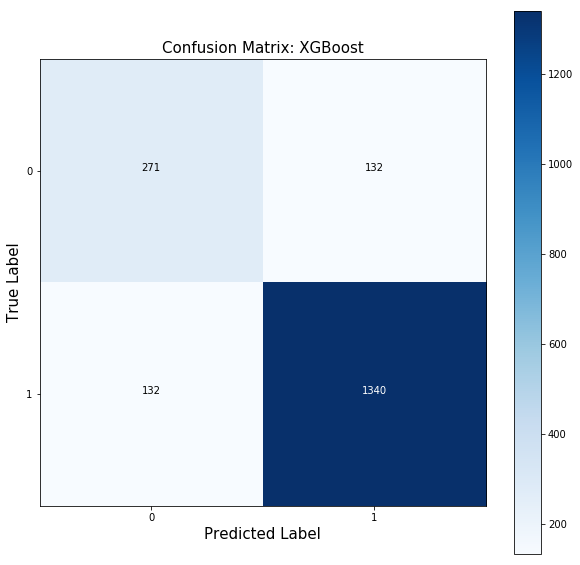

In [19]:
show_cf(y_test, test_preds, model_name='XGBoost')